In [5]:
using Statistics, Plots, QuadGK

In [2]:
using Pkg

In [3]:
Pkg.add("QuadGK")

  Updating registry at `C:\Users\masahiro\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %===============================>         ]  75.5 % Resolving package versions...
 Installed BandedMatrices ─ v0.12.4
 Installed LazyArrays ───── v0.12.3
 Installed DiffEqBase ───── v6.4.1
  Updating `C:\Users\masahiro\.julia\environments\v1.2\Project.toml`
  [1fd47b50] + QuadGK v2.0.3
  Updating `C:\Users\masahiro\.julia\environments\v1.2\Manifest.toml`
  [aae01518] ↑ BandedMatrices v0.12.3 ⇒ v0.12.4
  [2b5f629d] ↑ DiffEqBase v6.3.6 ⇒ v6.4.1
  [5078a376] ↑ LazyArrays v0.12.2 ⇒ v0.12.3


In [28]:
x = -pi:0.01:pi
# x = 0.0:0.01:pi
# x = -2*pi:0.01:2*pi
y = x.^2 .+1.0;

In [29]:
function cosine_approx_x2(N)
    y_approx = zeros(length(x))
    y_approx .+= (1+(pi^2)/3)
    
    for n = 1:N
        cn = (1/(pi/2)) * (2*pi/(n^2)) * cos(pi*n)
        
        y_approx .+= cn .* cos.(n.*x)
    end
    return y_approx
end;


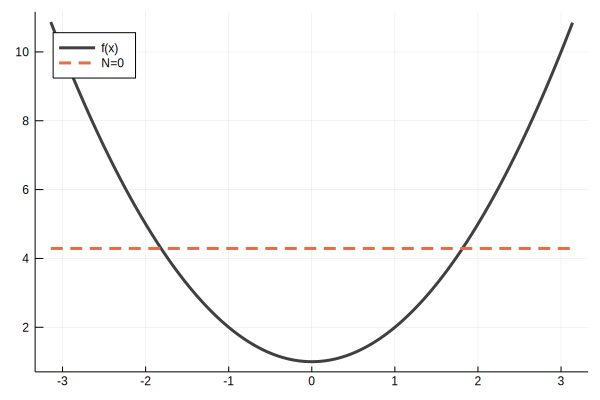

In [30]:
plot(x,y,linewidth=3, alpha=0.75, color=:black, legend=:topleft, label="f(x)")
N=0
plot!(x, cosine_approx_x2(N), linewidth=3, linestyle=:dash, label="N=0")

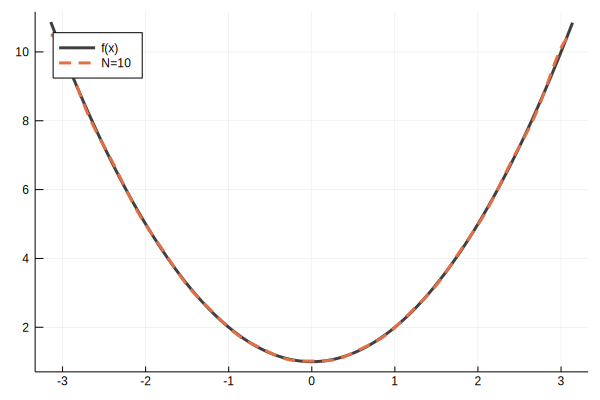

In [31]:
plot(x,y,linewidth=3, alpha=0.75, color=:black, legend=:topleft, label="f(x)")
N=10
plot!(x, cosine_approx_x2(N), linewidth=3, linestyle=:dash, label="N=10")

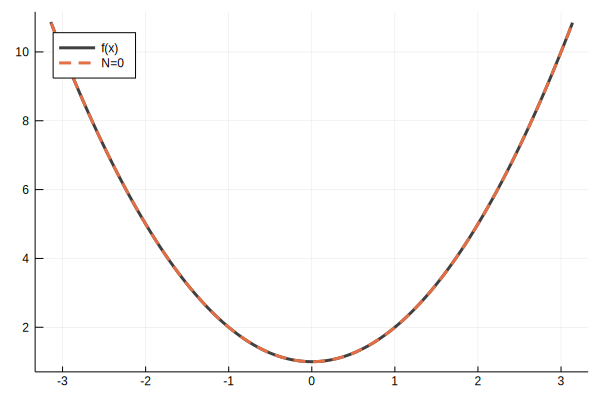

In [32]:
plot(x,y,linewidth=3, alpha=0.75, color=:black, legend=:topleft, label="f(x)")
N=100
plot!(x, cosine_approx_x2(N), linewidth=3, linestyle=:dash, label="N=0")

In [45]:
f(x) = (1/(x^2+1)) * sin(3*pi*x);
x = 0:0.01:pi;
x1 = 0.0:0.01:5

0.0:0.01:5.0

In [40]:
function cosine_approx(x,f,N)
    
    y_approx = zeros(length(x))
    
    y_approx .+ quadgk(f,x[1],x[end])[1]/(pi)
    
    for n=1:N
        g(x) = f(x)*cos(n*x)
        
        cn = (1/(pi/2))*quadgk(g,x[1],x[end])[1]
        
        y_approx .+= cn .* cos.(n .* x)
    end
    return y_approx
end;

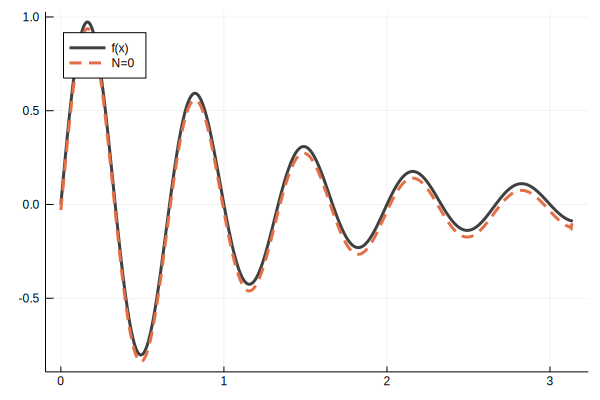

In [44]:
plot(x,f.(x),linewidth=3, alpha=0.75, color=:black, legend=:topleft, label="f(x)")
N=1000
plot!(x, cosine_approx(x,f,N), linewidth=3, linestyle=:dash, label="N=0")

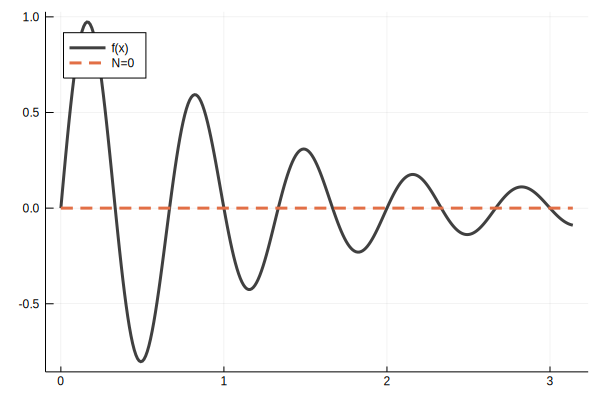

In [43]:
plot(x,f.(x),linewidth=3, alpha=0.75, color=:black, legend=:topleft, label="f(x)")
N=0
plot!(x, cosine_approx(x,f,N), linewidth=3, linestyle=:dash, label="N=0")

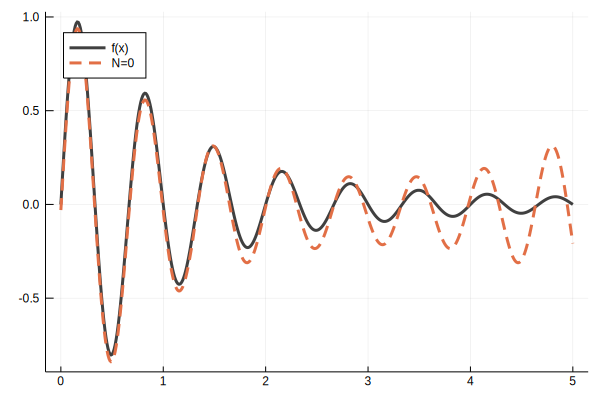

In [47]:
plot(x1,f.(x1),linewidth=3, alpha=0.75, color=:black, legend=:topleft, label="f(x)")
N=1000
plot!(x1, cosine_approx(x1,f,N), linewidth=3, linestyle=:dash, label="N=0")